In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns 

# Load the variable-to-category mapping file
categories_mapping = pd.read_excel('categorized_variables_v3 (1).xlsx')

# Load the main dataset
df = pd.read_csv('ForKathryn_2025Apr07-2_nopsw-1.csv')

# Replace common placeholders for missing values with None (NaN)
df.replace(['#NULL!', 'NULL', 'null', 'N/A', 'NA', '999', 999, '-999', '-999.00'], None, inplace=True)

C:\Users\artyo\AppData\Local\Temp\ipykernel_19756\1114973466.py:9: DtypeWarning: Columns (3,7,9,20,21,22,23,24,26,27,29,34,38,42,46,47,49,50,53,109,128,181,321,327,609,637,638,764,792,793,954,1036,1093,1107,1158,1201,1218,1237,1240,1242,1297,1311,1405,1422,1441,1444,1446,1449,1450,1454,1457,1458,1465,1466,1473,1476,1485,1486,1490,1494,1497,1498,1512) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ForKathryn_2025Apr07-2_nopsw-1.csv')


C:\Users\artyo\AppData\Local\Temp\ipykernel_19756\4253282592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalBISQ_M12_01'])  # Visual check for skewness, modality, and spread


<Axes: xlabel='TotalBISQ_M12_01', ylabel='Density'>

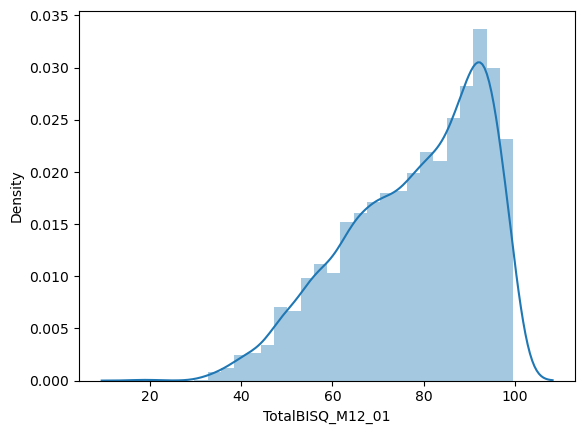

In [2]:
# Plot the distribution of the target variable
sns.distplot(df['TotalBISQ_M12_01'])  # Visual check for skewness, modality, and spread

In [3]:
# Select variables related to maternal substance use and mental health
# These will be used as input features for the model
features = categories_mapping[
    categories_mapping['PredictedCategory'].isin(['Maternal Substance Use', 'Maternal Mental Health'])
]['Variable'].to_list()

# Print the number of selected features
print(f"Number of selected features: {len(features)}")

Number of selected features: 107


In [4]:
filtered_df = df[['TotalBISQ_M12_01'] + features]

In [5]:
# Set the desired minimum fill rate
min_fill_rate = 0.75

# Keep only the features that exist in the dataframe
existing_features = [col for col in features if col in filtered_df.columns]

# Calculate the non-null proportion (fill rate) for each of those columns
fill_rates = filtered_df[existing_features].notnull().mean()

# Select features that meet the minimum fill rate threshold
well_filled_features = fill_rates[fill_rates >= min_fill_rate].index.tolist()

# Keep only the target variable and the well-filled input features
filtered_df = filtered_df[['TotalBISQ_M12_01'] + well_filled_features].copy()

# Print the number of well-filled columns
print(f'Number of well-filled features: {len(well_filled_features)}')

Number of well-filled features: 23


In [6]:
filtered_df

,TotalBISQ_M12_01,preg_demo_alcohol_ever,preg_demo_alch_before_week,preg_demo_alch_change,preg_demo_toba_ever,preg_demo_cannabis_ever,preg_demo_drugs_ever,hx_before_preg___1,hx_before_preg___4,hx_during_preg___1,...,Panx_rawT1,Panx_t_T1,ANXclassT1,ANXdicot,SLPdisturb_rawT1,SLPdisturb_t_T1,SLPimpair_rawT1,SLPimpair_t_T1,SleepCut,CDrisc_T1
0,96.89,1,4.0000,1,0,1,0,1,0,1,...,17.0,56.3,1.0,0.0,12.0,54.3,8.0,52.7,0.0,4.0
1,None,1,1.0000,1,0,0,0,0,0,0,...,13.0,51.3,0.0,0.0,5.0,37.5,7.0,50.1,1.0,7.0
2,None,1,2.0000,1,0,1,0,0,0,0,...,16.0,55.1,1.0,0.0,14.0,57.9,16.0,67.6,1.0,5.0
3,44.95,1,0.5000,1,0,0,0,0,0,0,...,17.0,56.3,1.0,0.0,14.0,57.9,10.0,56.7,1.0,7.0
4,93.85,1,5.0000,1,0,1,0,0,0,0,...,20.0,60.0,2.0,1.0,5.0,37.5,5.0,42.4,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,None,1,3.0000,1,0,0,0,0,0,0,...,14.0,52.6,0.0,0.0,8.0,46.2,10.0,56.7,1.0,8.0
10850,None,0,None,None,0,0,0,0,0,0,...,20.0,60.0,2.0,1.0,None,None,None,None,None,None
10851,None,1,2.0000,1,0,0,0,1,0,1,...,18.0,57.6,1.0,0.0,None,None,None,None,None,None
10852,None,1,2.0000,1,0,1,0,0,0,0,...,14.0,52.6,0.0,0.0,7.0,43.8,5.0,42.4,1.0,5.0


In [7]:
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [8]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


0:	learn: 15.2397659	test: 14.4818503	best: 14.4818503 (0)	total: 145ms	remaining: 28.8s
50:	learn: 14.6286413	test: 14.2871024	best: 14.2822579 (48)	total: 178ms	remaining: 519ms
100:	learn: 14.3028126	test: 14.2678282	best: 14.2521782 (93)	total: 210ms	remaining: 206ms
150:	learn: 14.0197567	test: 14.2990133	best: 14.2521782 (93)	total: 244ms	remaining: 79.3ms
199:	learn: 13.7177550	test: 14.3070557	best: 14.2521782 (93)	total: 278ms	remaining: 0us

bestTest = 14.25217816
bestIteration = 93

Shrink model to first 94 iterations.


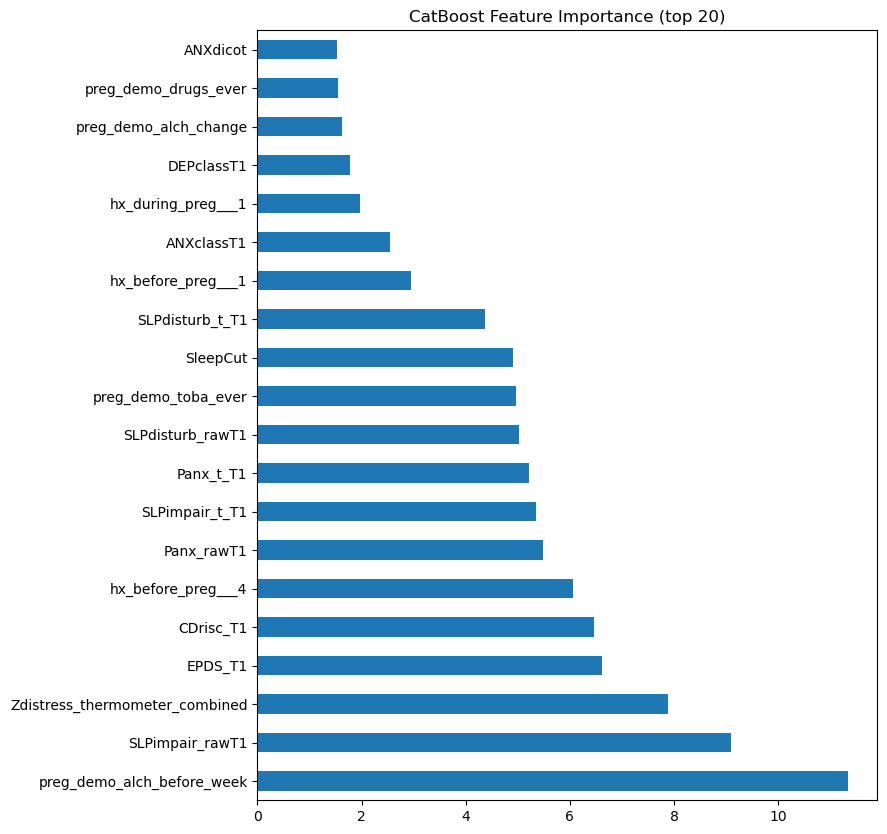

R2: 0.033916128671627854
RMSE: 14.25217822306553


C:\Users\artyo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import pandas as pd

# Define outcome variable and features
outcome = 'TotalBISQ_M12_01'
features = [col for col in filtered_df.columns if col != outcome]

# Drop rows with missing target values
df_cat = filtered_df.dropna(subset=[outcome])

# Separate features (X) and target (y)
X = df_cat[features]
y = df_cat[outcome]

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with chosen hyperparameters
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    verbose=50,
    random_seed=42
)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Compute and plot feature importance
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
feat_imp = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
feat_imp.head(20).plot(kind='barh')  # Show top 20 important features
plt.title('CatBoost Feature Importance (top 20)')
plt.show()

# Evaluate model performance using R² and RMSE
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

In [10]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


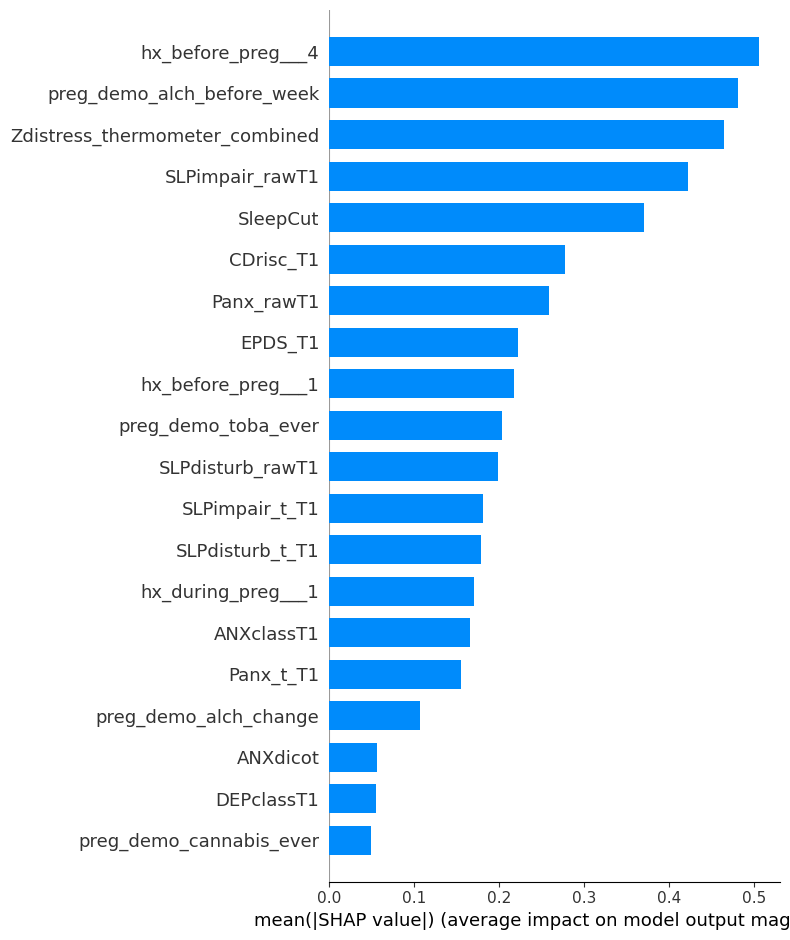

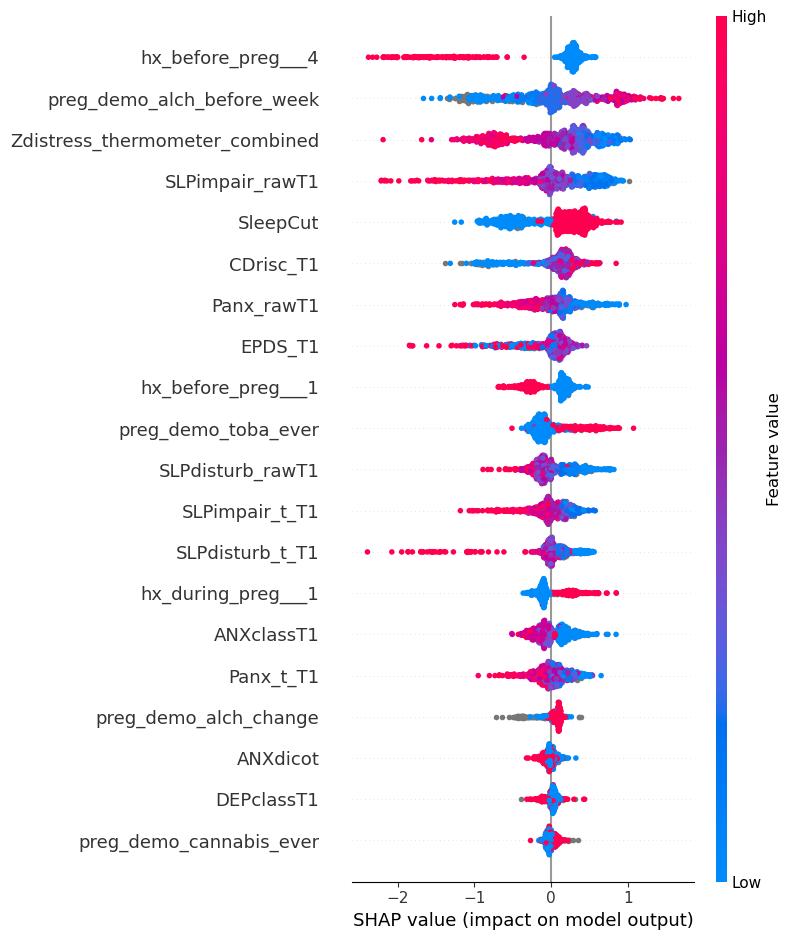

In [11]:
import shap

# Use CatBoost's native TreeExplainer for SHAP value calculation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (bar): shows average absolute SHAP value for each feature
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# Detailed summary plot: shows distribution of SHAP values per feature across samples
shap.summary_plot(shap_values, X_test)

In [12]:
import pandas as pd
import statsmodels.formula.api as smf

# Define target variable and a list of top features to test in linear model
outcome = 'TotalBISQ_M12_01'
top_features = [
    'hx_before_preg___4',
    'preg_demo_alch_before_week',
    'Zdistress_thermometer_combined',
    'SLPimpair_rawT1',
    'SleepCut',
    'CDrisc_T1'
]

# Subset the dataframe to only include the target and selected features
cols = [outcome] + top_features
df_lin = filtered_df[cols].copy()

# Convert all values to numeric; non-convertible values will become NaN
df_lin = df_lin.apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values in the outcome or predictors
df_lin = df_lin.dropna(subset=cols)

# Build a linear regression model using the specified formula
formula = outcome + ' ~ ' + ' + '.join(top_features)
model = smf.ols(formula=formula, data=df_lin)
result = model.fit()

# Print model summary with coefficients, p-values, R², etc.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalBISQ_M12_01   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     14.98
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           5.72e-17
Time:                        19:45:10   Log-Likelihood:                -13161.
No. Observations:                3190   AIC:                         2.634e+04
Df Residuals:                    3183   BIC:                         2.638e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   